In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qclab.models.spin_boson import SpinBosonModel
from qclab.drivers.serial_driver import dynamics_serial
from qclab.recipes import MeanFieldDynamicsRecipe

input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l_reorg=0.02/4)

model = SpinBosonModel(input_params = input_params)

model.wf_db = np.zeros((model.num_states), dtype=complex)
model.wf_db[0] = 1.0 + 0.0j



recipe = MeanFieldDynamicsRecipe()

recipe.params.num_trajs = 105
recipe.params.batch_size = 10
recipe.params.tmax = 40
recipe.params.dt_output = 0.1
recipe.params.dt = 0.01


data = dynamics_serial(recipe = recipe, model = model, ncpus = 1, data = None)
print(len(data.seed_list))
print(data.seed_list)
data = dynamics_serial(recipe = recipe, model = model, ncpus = 1, data = data)
print(len(data.seed_list))
print(data.seed_list)

100%|██████████| 11/11 [00:12<00:00,  1.12s/it]


105
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104]


100%|██████████| 22/22 [00:22<00:00,  1.04s/it]

210
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qclab.models.spin_boson import SpinBosonModel
from qclab.drivers.serial_driver import dynamics_serial
import qclab.recipes as recipes

input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l_reorg=0.02/4)
model = SpinBosonModel(input_params = input_params)

model.wf_db = np.zeros((model.num_states), dtype=complex)
model.wf_db[0] = 1.0 + 0.0j



recipe = recipes.FewestSwitchesSurfaceHoppingDynamicsRecipe()

recipe.params.num_trajs = 10
recipe.params.batch_size = 10
recipe.params.tmax = 40
recipe.params.dt_output = 0.1
recipe.params.dt = 0.01


data = dynamics_serial(recipe = recipe, model = model, ncpus = 1, data = None)

100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from qclab.models.spin_boson import SpinBosonModel
from qclab.drivers.serial_driver import dynamics_serial
import qclab.recipes as recipes

input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l_reorg=0.02/4)

model = SpinBosonModel(input_params = input_params)

model.wf_db = np.zeros((model.num_states), dtype=complex)
model.wf_db[0] = 1.0 + 0.0j



recipe = recipes.CoherentFewestSwitchesSurfaceHoppingDynamicsRecipe()

recipe.params.num_trajs = 10
recipe.params.batch_size = 10
recipe.params.tmax = 40
recipe.params.dt_output = 0.1
recipe.params.dt = 0.01


data = dynamics_serial(recipe = recipe, model = model, ncpus = 1, data = None)
print(len(data.seed_list))
print(data.seed_list)
print(recipe.params.batch_size)
data = dynamics_serial(recipe = recipe, model = model, ncpus = 1, data = data)
print(len(data.seed_list))
print(data.seed_list)

100%|██████████| 2/2 [00:04<00:00,  2.18s/it]

10
[0 1 2 3 4 5 6 7 8 9]
0


ZeroDivisionError: division by zero

10


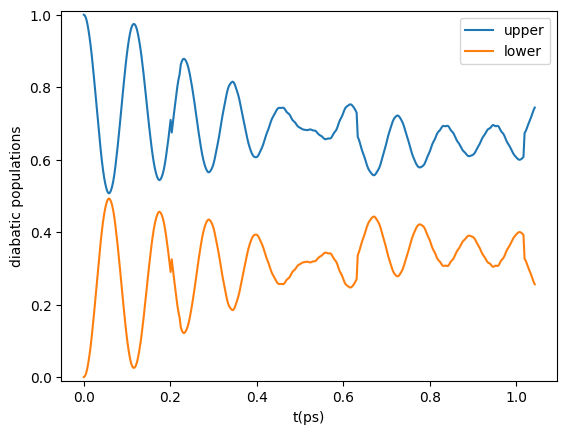

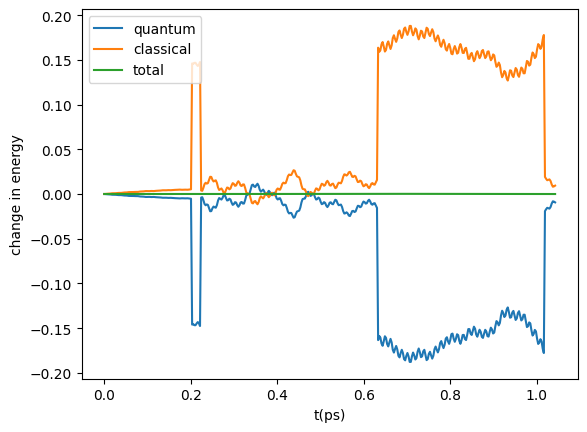

In [3]:
ntraj =  len(data.data_dic['seeds'])#seed_list) # obtain number of trajectories to normalize
print(ntraj)
pops = np.real(np.einsum('nii->ni',data.data_dic['dm_db']))/ntraj # obtain diagonal of density matrix
t_ps = data.data_dic['t'] * 0.0260677 /ntraj # convert time units to picoseconds
e_q = data.data_dic['e_q']/ntraj # quantum energy
e_c = data.data_dic['e_c']/ntraj # classical energy

# plot diabatic populations
plt.plot(t_ps, pops[:,0], label='upper')
plt.plot(t_ps, pops[:,1], label='lower')
plt.ylabel('diabatic populations')
plt.xlabel('t(ps)')
plt.legend()
plt.ylim([-0.01,1.01])
plt.savefig('../docs/images/pops_sb_mf.png', dpi=600)
plt.show()

# plot change in energy
plt.plot(t_ps, np.real(e_q - e_q[0]), label='quantum')
plt.plot(t_ps, np.real(e_c - e_c[0]), label='classical')
plt.plot(t_ps, np.real(e_c - e_c[0] + e_q - e_q[0]), label='total')
plt.ylabel('change in energy')
plt.xlabel('t(ps)')
plt.legend()
plt.savefig('../docs/images/de_sb_mf.png', dpi=600)
plt.show()

In [10]:
from qclab.models.spin_boson import SpinBosonModel

input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l_reorg=0.02/4)
model = SpinBosonModel(input_params = input_params)

model.batch_size = 100
model.tmax = 40
model.dt_output = 0.1
model.dt = 0.01


import numpy as np
model.wf_db = np.zeros((model.num_states), dtype=complex)
model.wf_db[0] = 1.0 + 0.0j

seeds = np.arange(10*model.batch_size, dtype=int)

from qclab.recipes import FewestSwitchesSurfaceHoppingDynamicsRecipe
recipe = FewestSwitchesSurfaceHoppingDynamicsRecipe(model)

from qclab.drivers.serial_driver import dynamics_serial

data = dynamics_serial(recipe=recipe, model = model, seeds = seeds, ncpus=1, data = None)

100%|██████████| 10/10 [02:44<00:00, 16.45s/it]


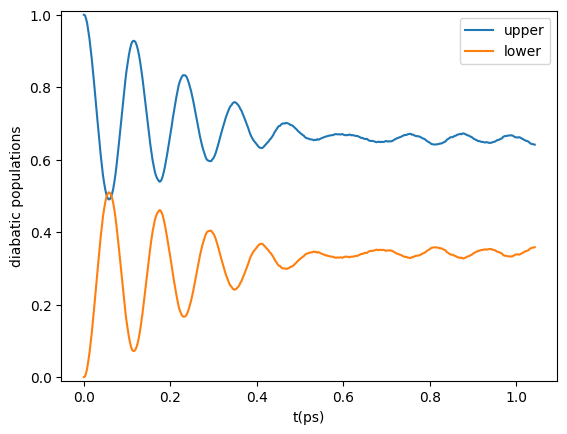

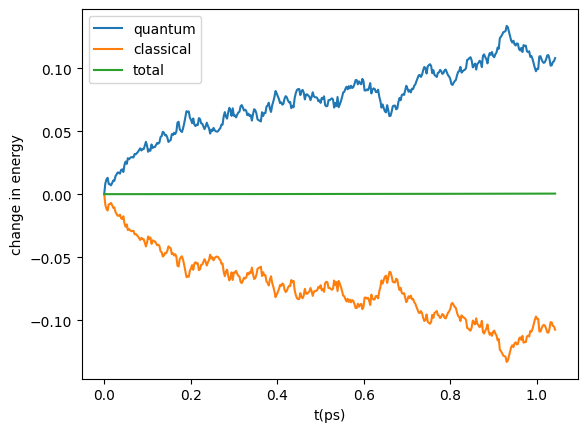

In [13]:
ntraj =  len(data.seed_list) # obtain number of trajectories to normalize
pops = np.real(np.einsum('nii->ni',data.data_dic['dm_db']))/ntraj # obtain diagonal of density matrix
t_ps = data.data_dic['t'] * 0.0260677 /ntraj # convert time units to picoseconds
e_q = data.data_dic['e_q']/ntraj # quantum energy
e_c = data.data_dic['e_c']/ntraj # classical energy

# plot diabatic populations
import matplotlib.pyplot as plt
plt.plot(t_ps, pops[:,0], label='upper')
plt.plot(t_ps, pops[:,1], label='lower')
plt.ylabel('diabatic populations')
plt.xlabel('t(ps)')
plt.legend()
plt.ylim([-0.01,1.01])
plt.savefig('../docs/images/pops_sb_fssh.png', dpi=600)
plt.show()

# plot change in energy
plt.plot(t_ps, np.real(e_q - e_q[0]), label='quantum')
plt.plot(t_ps, np.real(e_c - e_c[0]), label='classical')
plt.plot(t_ps, np.real(e_c - e_c[0] + e_q - e_q[0]), label='total')
plt.ylabel('change in energy')
plt.xlabel('t(ps)')
plt.legend()
plt.savefig('../docs/images/de_sb_fssh.png', dpi=600)
plt.show()

In [15]:
from qclab.models.spin_boson import SpinBosonModel

input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l_reorg=0.02/4)
model = SpinBosonModel(input_params = input_params)

model.batch_size = 100
model.tmax = 40
model.dt_output = 0.1
model.dt = 0.01


import numpy as np
model.wf_db = np.zeros((model.num_states), dtype=complex)
model.wf_db[0] = 1.0 + 0.0j

seeds = np.arange(10*model.batch_size, dtype=int)

from qclab.recipes import CoherentFewestSwitchesSurfaceHoppingDynamicsRecipe
recipe = CoherentFewestSwitchesSurfaceHoppingDynamicsRecipe(model)

from qclab.drivers.serial_driver import dynamics_serial

data = dynamics_serial(recipe=recipe, model = model, seeds = seeds, ncpus=1, data = None)

100%|██████████| 10/10 [04:21<00:00, 26.16s/it]


In [17]:
new_seeds = data.seed_list + len(data.seed_list) # increment seeds up
print(data.seed_list)
print(new_seeds)
data = dynamics_serial(recipe=recipe, model = model, seeds = new_seeds, ncpus=1, data = data)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350
 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530
 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710
 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890
 900 910 920 930 940 950 960 970 980 990   1  11  21  31  41  51  61  71
  81  91 101 111 121 131 141 151 161 171 181 191 201 211 221 231 241 251
 261 271 281 291 301 311 321 331 341 351 361 371 381 391 401 411 421 431
 441 451 461 471 481 491 501 511 521 531 541 551 561 571 581 591 601 611
 621 631 641 651 661 671 681 691 701 711 721 731 741 751 761 771 781 791
 801 811 821 831 841 851 861 871 881 891 901 911 921 931 941 951 961 971
 981 991   2  12  22  32  42  52  62  72  82  92 102 112 122 132 142 152
 162 172 182 192 202 212 222 232 242 252 262 272 282 292 302 312 322 332
 342 352 362 372 382 392 402 412 422 432 442 452 46

100%|██████████| 10/10 [04:27<00:00, 26.77s/it]


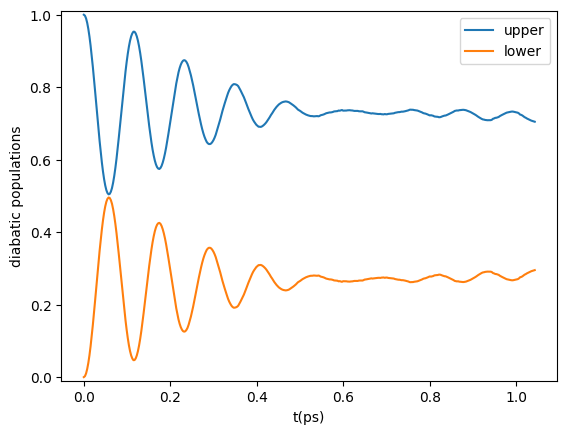

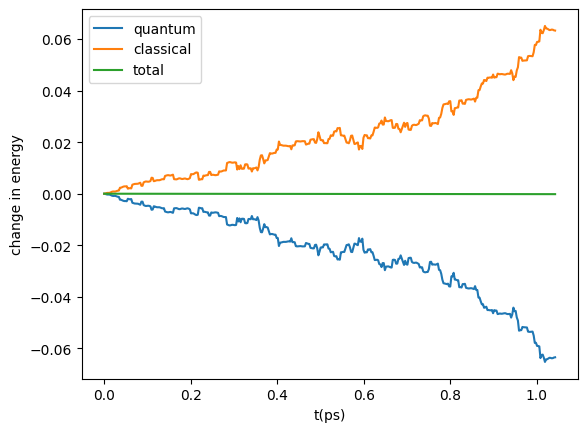

In [16]:
ntraj =  len(data.seed_list) # obtain number of trajectories to normalize
pops = np.real(np.einsum('nii->ni',data.data_dic['dm_db']))/ntraj # obtain diagonal of density matrix
t_ps = data.data_dic['t'] * 0.0260677 /ntraj # convert time units to picoseconds
e_q = data.data_dic['e_q']/ntraj # quantum energy
e_c = data.data_dic['e_c']/ntraj # classical energy

# plot diabatic populations
import matplotlib.pyplot as plt
plt.plot(t_ps, pops[:,0], label='upper')
plt.plot(t_ps, pops[:,1], label='lower')
plt.ylabel('diabatic populations')
plt.xlabel('t(ps)')
plt.legend()
plt.ylim([-0.01,1.01])
plt.savefig('../docs/images/pops_sb_cfssh.png', dpi=600)
plt.show()

# plot change in energy
plt.plot(t_ps, np.real(e_q - e_q[0]), label='quantum')
plt.plot(t_ps, np.real(e_c - e_c[0]), label='classical')
plt.plot(t_ps, np.real(e_c - e_c[0] + e_q - e_q[0]), label='total')
plt.ylabel('change in energy')
plt.xlabel('t(ps)')
plt.legend()
plt.savefig('../docs/images/de_sb_cfssh.png', dpi=600)
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt   
# import the Spin-Boson Model Class
from qclab.models.spin_boson import SpinBosonModel

import qclab.auxiliary as auxiliary

input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l_reorg=0.02/4)
model = SpinBosonModel(input_params = input_params)

model.batch_size = 200
model.tmax=40
model.dt_output=0.01
model.dt=0.01

#model.sh_deterministic = False
#model.num_branches = 1




model.wf_db = np.zeros((model.num_states),dtype=complex)
# initialize a quantum state in the upper state
model.wf_db[0] = 1

num_seeds = 10*model.batch_size
seeds = np.arange(0, num_seeds)

# import the mean-field dynamics Algorithm Class
from qclab.recipes import FewestSwitchesSurfaceHoppingDynamicsRecipe
recipe_fssh = FewestSwitchesSurfaceHoppingDynamicsRecipe(model)

# import the serial driver 
from qclab.drivers.serial_driver import dynamics_serial

# import the data class from auxiliary
from qclab.auxiliary import Data


data_fssh = dynamics_serial(recipe=recipe_fssh, model = model, seeds = seeds, ncpus=1, data = Data())

100%|██████████| 10/10 [03:05<00:00, 18.55s/it]


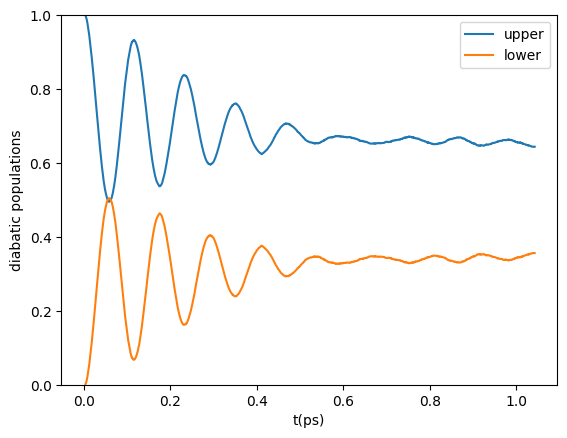

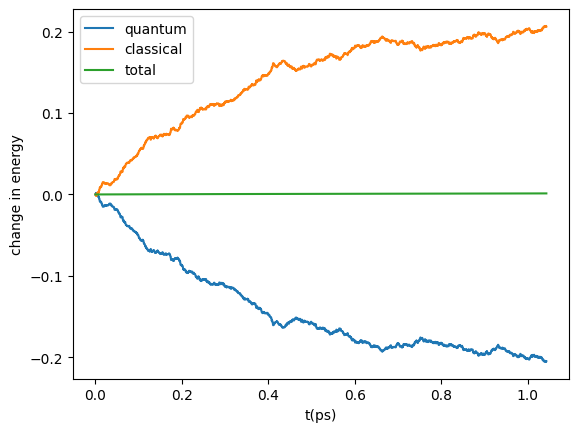

In [6]:
ntraj =  num_seeds
pops_fssh = np.real(np.einsum('nii->ni',data_fssh.data_dic['dm_db']))/ntraj
t_ps = data_fssh.data_dic['t'] * 0.0260677 /ntraj
e_q = data_fssh.data_dic['e_q']/ntraj
e_c = data_fssh.data_dic['e_c']/ntraj
#bound1 = data_mf.data_dic['bound1']/ntraj
#bound2 = data_mf.data_dic['bound2']/ntraj
plt.plot(t_ps, pops_fssh[:,0], label='upper')
plt.plot(t_ps, pops_fssh[:,1], label='lower')
plt.ylabel('diabatic populations')
plt.xlabel('t(ps)')
plt.legend()
plt.ylim([0,1])
plt.savefig('pops_sb_mf.pdf')
plt.show()
#
#plt.plot(t_ps, bound1)
#plt.plot(t_ps, bound2)
#plt.plot(t_ps, e_q)
#plt.xlim([0,.1])
plt.show()
plt.plot(t_ps, np.real(e_q - e_q[0]), label='quantum')
plt.plot(t_ps, np.real(e_c - e_c[0]), label='classical')
plt.plot(t_ps, np.real(e_c - e_c[0] + e_q - e_q[0]), label='total')
plt.ylabel('change in energy')
plt.xlabel('t(ps)')
plt.legend()
plt.savefig('de_sb_mf.pdf')
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt   
# import the Spin-Boson Model Simulation Class
from qclab.models.spin_boson import SpinBosonModel

import qclab.auxiliary as auxiliary

input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l_reorg=.1/4)
model = SpinBosonModel(input_params = input_params)

model.batch_size = 10
model.tmax=10
model.dt_output=0.01
model.dt=0.01
model.init_classical =  auxiliary.harmonic_oscillator_focused_init_classical

model.g = np.zeros((model.batch_size, 1, model.num_classical_coordinates)) + model.g[...,:]

model.wf_db = np.zeros((model.num_states),dtype=complex)
# initialize a quantum state in the upper state
model.wf_db[0] = 1

num_seeds = 1*model.batch_size
seeds = np.arange(0, num_seeds)

# import the mean-field dynamics Algorithm Class
from qclab.recipes import MeanFieldDynamicsRecipe
recipe_mf = MeanFieldDynamicsRecipe(model)
g0 = np.copy(model.g)
rand = (np.random.rand(*np.shape(g0)) < 0.5).astype(int)
def update_couplings(state):
    zpe = state.model.pq_weight/2
    energy = np.real(state.model.pq_weight * np.conj(state.z_coord) * state.z_coord)
    off_pos  = ((energy < zpe*0.9)).astype(int)
    state.model.g = g0*(1 - off_pos)
    return state
recipe_mf.output.append(update_couplings)

# import the serial driver 
from qclab.drivers.serial_driver import dynamics_serial
# import the simulation data class
import qclab.simulation as simulation


data_mf = dynamics_serial(recipe=recipe_mf, model = model, seeds = seeds, ncpus=1, data = simulation.Data())

ModuleNotFoundError: No module named 'qclab.simulation'

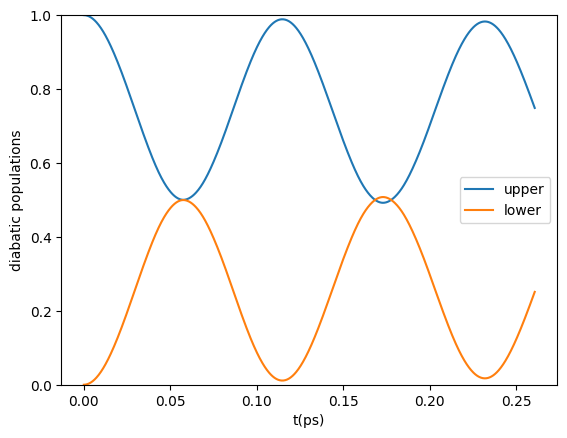

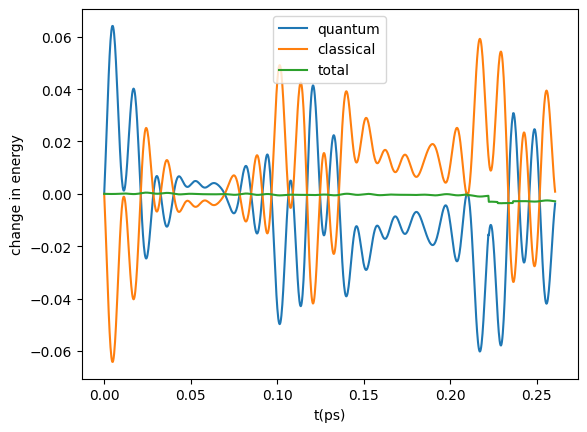

In [8]:
ntraj =  num_seeds
pops_mf = np.real(np.einsum('nii->ni',data_mf.data_dic['dm_db']))/ntraj
t_ps = data_mf.data_dic['t'] * 0.0260677 /ntraj
e_q = data_mf.data_dic['e_q']/ntraj
e_c = data_mf.data_dic['e_c']/ntraj
#bound1 = data_mf.data_dic['bound1']/ntraj
#bound2 = data_mf.data_dic['bound2']/ntraj
plt.plot(t_ps, pops_mf[:,0], label='upper')
plt.plot(t_ps, pops_mf[:,1], label='lower')
plt.ylabel('diabatic populations')
plt.xlabel('t(ps)')
plt.legend()
plt.ylim([0,1])
plt.savefig('pops_sb_mf.pdf')
plt.show()
#
#plt.plot(t_ps, bound1)
#plt.plot(t_ps, bound2)
#plt.plot(t_ps, e_q)
#plt.xlim([0,.1])
plt.show()
plt.plot(t_ps, np.real(e_q - e_q[0]), label='quantum')
plt.plot(t_ps, np.real(e_c - e_c[0]), label='classical')
plt.plot(t_ps, np.real(e_c - e_c[0] + e_q - e_q[0]), label='total')
plt.ylabel('change in energy')
plt.xlabel('t(ps)')
plt.legend()
plt.savefig('de_sb_mf.pdf')
plt.show()

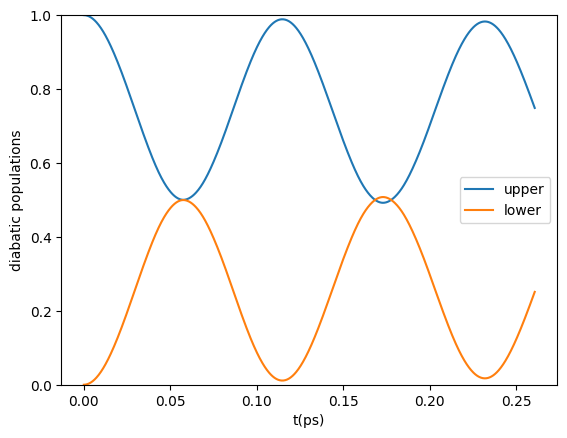

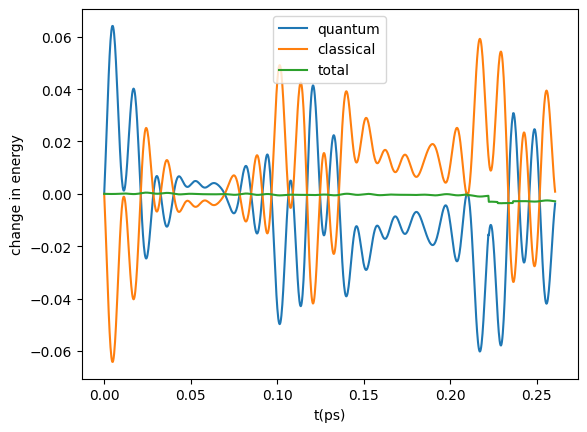

In [9]:
ntraj =  num_seeds
pops_mf = np.real(np.einsum('nii->ni',data_mf.data_dic['dm_db']))/ntraj
t_ps = data_mf.data_dic['t'] * 0.0260677 /ntraj
e_q = data_mf.data_dic['e_q']/ntraj
e_c = data_mf.data_dic['e_c']/ntraj
#bound1 = data_mf.data_dic['bound1']/ntraj
#bound2 = data_mf.data_dic['bound2']/ntraj
plt.plot(t_ps, pops_mf[:,0], label='upper')
plt.plot(t_ps, pops_mf[:,1], label='lower')
plt.ylabel('diabatic populations')
plt.xlabel('t(ps)')
plt.legend()
plt.ylim([0,1])
plt.savefig('pops_sb_mf.pdf')
plt.show()
#
#plt.plot(t_ps, bound1)
#plt.plot(t_ps, bound2)
#plt.plot(t_ps, e_q)
#plt.xlim([0,.1])
plt.show()
plt.plot(t_ps, np.real(e_q - e_q[0]), label='quantum')
plt.plot(t_ps, np.real(e_c - e_c[0]), label='classical')
plt.plot(t_ps, np.real(e_c - e_c[0] + e_q - e_q[0]), label='total')
plt.ylabel('change in energy')
plt.xlabel('t(ps)')
plt.legend()
plt.savefig('de_sb_mf.pdf')
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt   
# import the Spin-Boson Model Simulation Class
from qclab.models.spin_boson import SpinBosonModel
# import the mean-field dynamics Algorithm Class
from qclab.recipes import FewestSwitchesSurfaceHoppingDynamicsRecipe
# import the serial driver 
from qclab.drivers.serial_driver import dynamics_serial
# import the simulation data class
import qclab.simulation as simulation

input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l=0.02/4)
model = SpinBosonModel(input_params = input_params)

model.batch_size = 20
model.tmax=40
model.dt_output=0.1
model.dt=0.01

model.wf_db = np.zeros((model.num_states),dtype=complex)
model.wf_db[0] = 1

recipe_FSSH = FewestSwitchesSurfaceHoppingDynamicsRecipe(model)

num_seeds = 20*model.batch_size
seeds = np.arange(0, num_seeds)

data_fssh = dynamics_serial(recipe=recipe_FSSH, model = model, seeds = seeds, ncpus=1, data = simulation.Data())

KeyError: 'l_reorg'

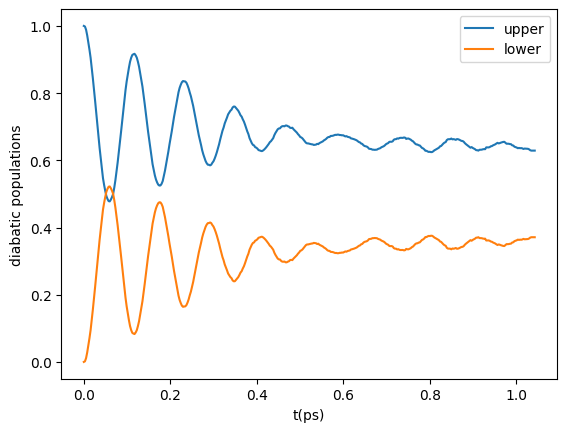

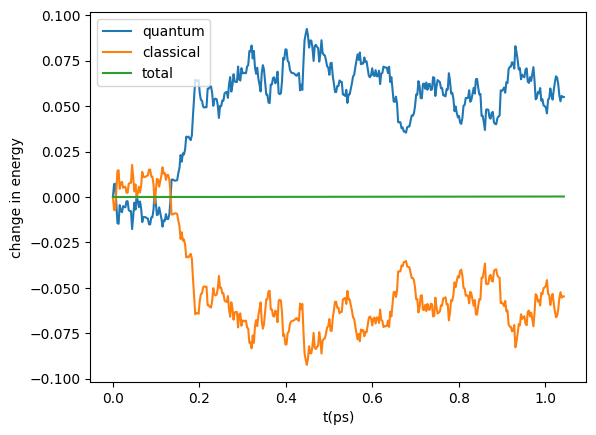

In [ ]:
ntraj =  num_seeds
pops_fssh = np.real(np.einsum('nii->ni',data_fssh.data_dic['dm_db']))/ntraj
t_ps = data_fssh.data_dic['t'] * 0.0260677 /ntraj
e_q = data_fssh.data_dic['e_q']/ntraj
e_c = data_fssh.data_dic['e_c']/ntraj

plt.plot(t_ps, pops_fssh[:,0], label='upper')
plt.plot(t_ps, pops_fssh[:,1], label='lower')
plt.ylabel('diabatic populations')
plt.xlabel('t(ps)')
plt.legend()
#plt.ylim([0,1])
plt.show()

plt.plot(t_ps, np.real(e_q - e_q[0]), label='quantum')
plt.plot(t_ps, np.real(e_c - e_c[0]), label='classical')
plt.plot(t_ps, np.real(e_c - e_c[0] + e_q - e_q[0]), label='total')
plt.ylabel('change in energy')
plt.xlabel('t(ps)')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#import qclab.simulation as simulation
from qclab.models.spin_boson import SpinBosonModel
from qclab.algorithms.mf import MeanFieldDynamics
#from qclab.algorithms.fssh import FewestSwitchesSurfaceHoppingDynamics
#from qclab.algorithms.cfssh import CoherentFewestSwitchesSurfaceHoppingDynamics
from qclab.drivers.ray_driver import dynamics_parallel_ray
from qclab.drivers.serial_driver import dynamics_serial

input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l=0.02/4)
model = SpinBosonModel(input_params = input_params)

model.batch_size = 200
model.tmax=int(1/0.0260677)+1
model.dt_output=0.01
model.dt=1/(10*model.w[-1])

model.wf_db = np.zeros((model.num_states),dtype=complex)
model.wf_db[0] = 1

num_seeds = 100*model.batch_size
seeds = np.arange(0, num_seeds)

data_spin_boson_mf = dynamics_serial(MeanFieldDynamics, model, seeds)

100%|██████████| 100/100 [12:06<00:00,  7.27s/it]


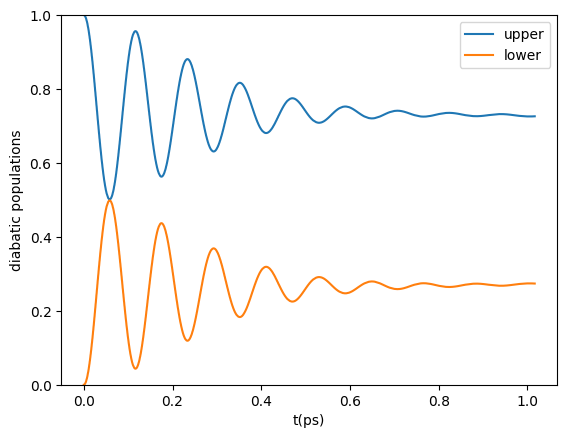

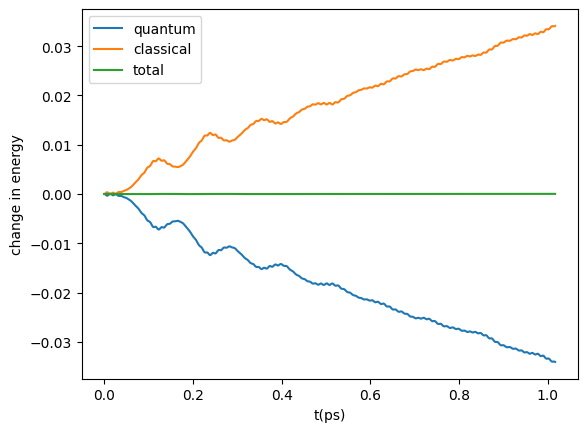

In [ ]:
ntraj =  num_seeds
pops_mf = np.real(np.einsum('nii->ni',data_spin_boson_mf.data_dic['dm_db']))/ntraj
t_ps = data_spin_boson_mf.data_dic['t'] * 0.0260677 /ntraj
e_q = data_spin_boson_mf.data_dic['e_q']/ntraj
e_c = data_spin_boson_mf.data_dic['e_c']/ntraj

plt.plot(t_ps, pops_mf[:,0], label='upper')
plt.plot(t_ps, pops_mf[:,1], label='lower')
plt.ylabel('diabatic populations')
plt.xlabel('t(ps)')
plt.legend()
plt.ylim([0,1])
plt.savefig('pops_sb_mf.pdf')
plt.savefig('pops_sb_mf.svg')
plt.savefig('pops_sb_mf.png')
plt.show()

plt.plot(t_ps, e_q - e_q[0], label='quantum')
plt.plot(t_ps, e_c - e_c[0], label='classical')
plt.plot(t_ps, e_c - e_c[0] + e_q - e_q[0], label='total')
plt.ylabel('change in energy')
plt.xlabel('t(ps)')
plt.legend()
plt.savefig('de_sb_mf.pdf')
plt.savefig('de_sb_mf.svg')
plt.savefig('de_sb_mf.png')
plt.show()

In [ ]:
input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l=0.02/4)
model = SpinBosonModel(input_params = input_params)

model.batch_size = 200
model.tmax=int(1/0.0260677)+1
model.dt_output=0.01
model.dt=1/(10*model.w[-1])

model.wf_db = np.zeros((model.num_states),dtype=complex)
model.wf_db[0] = 1


nprocs = 8
num_seeds = 100*model.batch_size
seeds = np.arange(0, num_seeds)
data_mf = dynamics_parallel_ray(MeanFieldDynamics, model, seeds, nprocs)#, simulation.Data())

2024-07-19 08:50:45,275	INFO worker.py:1771 -- Started a local Ray instance.
  0%|          | 0/13 [00:00<?, ?it/s](raylet) [2024-07-19 08:50:55,193 E 1519267 1519289] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-19_08-50-43_703275_1518367 is over 95% full, available space: 17947889664; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-19 08:51:05,220 E 1519267 1519289] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-19_08-50-43_703275_1518367 is over 95% full, available space: 17947828224; capacity: 493949374464. Object creation will fail if spilling is required.
  8%|▊         | 1/13 [00:23<04:42, 23.52s/it](raylet) [2024-07-19 08:51:15,267 E 1519267 1519289] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-19_08-50-43_703275_1518367 is over 95% full, available space: 17947795456; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-19 08:51:25,286 E 1519267 

KeyboardInterrupt: 

(raylet) [2024-07-19 08:54:55,827 E 1519267 1519289] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-19_08-50-43_703275_1518367 is over 95% full, available space: 17946300416; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-19 08:55:05,838 E 1519267 1519289] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-19_08-50-43_703275_1518367 is over 95% full, available space: 17946234880; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-19 08:55:15,847 E 1519267 1519289] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-19_08-50-43_703275_1518367 is over 95% full, available space: 17946112000; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-19 08:55:25,855 E 1519267 1519289] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-19_08-50-43_703275_1518367 is over 95% full, available space: 17946103808; capacity: 49394

In [ ]:
input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l=0.02/4)
model = SpinBosonModel(input_params = input_params)

model.batch_size = 20
model.tmax=int(1/0.0260677)+1
model.dt_output=0.01
model.dt=1/(10*model.w[-1])

model.wf_db = np.zeros((model.num_states),dtype=complex)
model.wf_db[0] = 1


nprocs = 8
num_seeds = 10*model.batch_size
seeds = np.arange(0, num_seeds)
data_fssh = dynamics_parallel_ray(FewestSwitchesSurfaceHoppingDynamics, model, seeds, nprocs, simulation.Data())

2024-07-15 13:53:44,222	INFO worker.py:1771 -- Started a local Ray instance.
  0%|          | 0/2 [00:00<?, ?it/s](raylet) [2024-07-15 13:53:54,149 E 1165999 1166021] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-53-42_635297_1164054 is over 95% full, available space: 18829627392; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 13:54:04,177 E 1165999 1166021] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-53-42_635297_1164054 is over 95% full, available space: 18829406208; capacity: 493949374464. Object creation will fail if spilling is required.
100%|██████████| 2/2 [00:33<00:00, 16.53s/it]


In [ ]:
input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l=0.02/4)
sim = SpinBosonModel(input_params = input_params)

sim.batch_size = 20 # sim.batch_size
sim.tmax=int(1/0.0260677)+1
sim.dt_output=0.01
sim.dt=1/(10*sim.w[-1])

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 10*sim.batch_size
seeds = np.arange(0, num_seeds)
data_cfssh = dynamics_parallel_ray(CoherentFewestSwitchesSurfaceHoppingDynamics, sim, seeds, nprocs, simulation.Data())

2024-07-15 13:51:00,791	INFO worker.py:1771 -- Started a local Ray instance.
  0%|          | 0/2 [00:00<?, ?it/s](raylet) [2024-07-15 13:51:10,714 E 1165246 1165269] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-50-59_102509_1164054 is over 95% full, available space: 18830163968; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 13:51:20,737 E 1165246 1165269] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-50-59_102509_1164054 is over 95% full, available space: 18830848000; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 13:51:30,750 E 1165246 1165269] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-50-59_102509_1164054 is over 95% full, available space: 18830839808; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 13:51:40,773 E 1165246 1165269] (raylet) file_system_monitor.cc:111: /

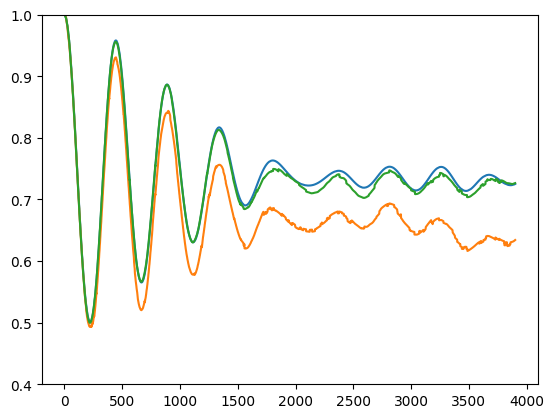

In [ ]:
pops_fssh = np.real(np.einsum('nii->ni',data_fssh.data_dic['dm_db']))
ntraj = np.sum(pops_fssh[0])
pops_fssh = pops_fssh/ntraj

pops_mf = np.real(np.einsum('nii->ni',data_mf.data_dic['dm_db']))
ntraj = np.sum(pops_mf[0])
pops_mf = pops_mf/ntraj

pops_cfssh = np.real(np.einsum('nii->ni',data_cfssh.data_dic['dm_db']))
ntraj = np.sum(pops_cfssh[0])
pops_cfssh = pops_cfssh/ntraj

plt.plot(pops_mf[:,0])
plt.plot(pops_fssh[:,0])
plt.plot(pops_cfssh[:,0])
plt.ylim([0.4,1])
plt.show()